<a href="https://colab.research.google.com/github/Blackcurrant06/MachineLearning/blob/main/Week3/Infrared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


(1020, 34)
Shape of the DataFrame: (1020, 34)

Data Types:
Gender          object
Age             object
Ethnicity       object
T_atm          float64
Humidity       float64
Distance       float64
T_offset1      float64
Max1R13_1      float64
Max1L13_1      float64
aveAllR13_1    float64
aveAllL13_1    float64
T_RC1          float64
T_RC_Dry1      float64
T_RC_Wet1      float64
T_RC_Max1      float64
T_LC1          float64
T_LC_Dry1      float64
T_LC_Wet1      float64
T_LC_Max1      float64
RCC1           float64
LCC1           float64
canthiMax1     float64
canthi4Max1    float64
T_FHCC1        float64
T_FHRC1        float64
T_FHLC1        float64
T_FHBC1        float64
T_FHTC1        float64
T_FH_Max1      float64
T_FHC_Max1     float64
T_Max1         float64
T_OR1          float64
T_OR_Max1      float64
aveOralM       float64
dtype: object

Missing Values:
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1

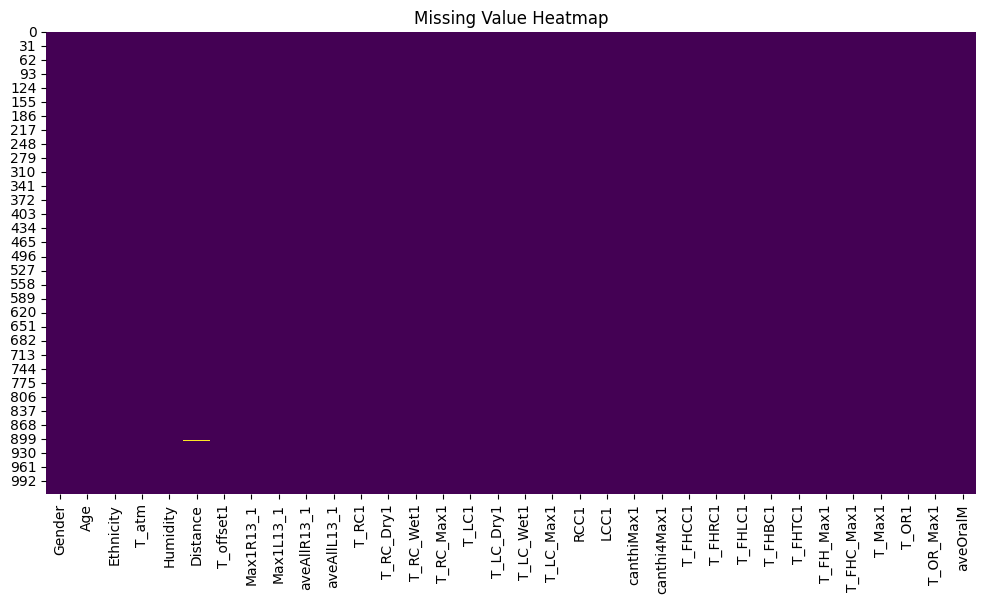


Descriptive Statistics for 'aveOralM':
count    1020.000000
mean       37.028382
std         0.509502
min        35.540000
25%        36.777500
50%        36.940000
75%        37.140000
max        40.340000
Name: aveOralM, dtype: float64


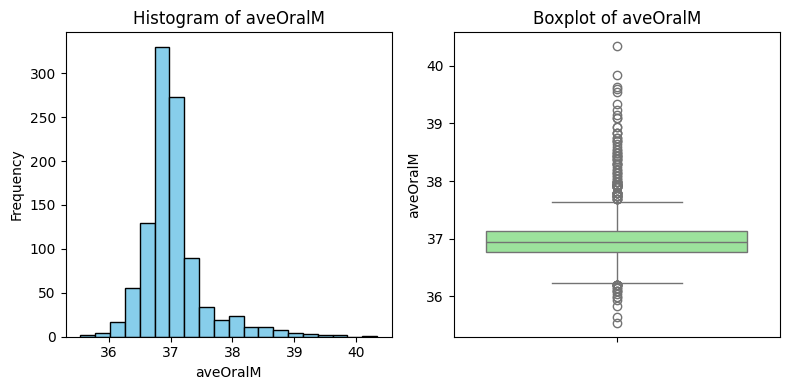

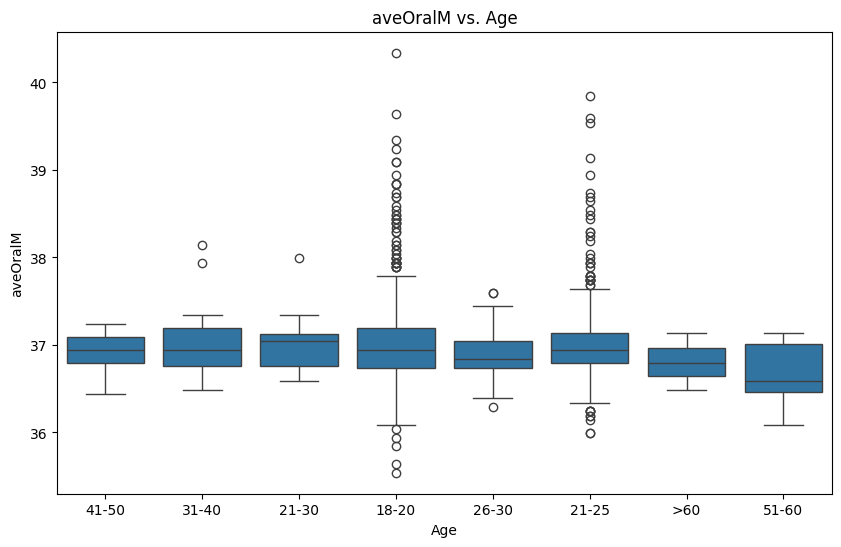

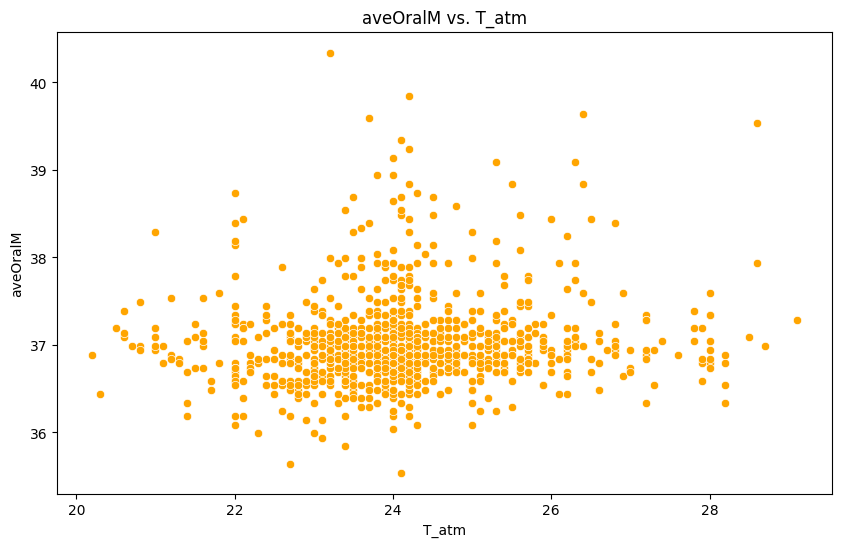


Summary:
The dataset has some missing values, particularly in certain columns. The distribution of 'aveOralM' shows some outliers.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('Infrared.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Infrared (1).csv' not found.")

print(f"Shape of the DataFrame: {df.shape}")

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_values)
print("\nMissing Value Percentage:")
print(missing_percentage)

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

print("\nDescriptive Statistics for 'aveOralM':")
print(df['aveOralM'].describe())

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(df['aveOralM'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('aveOralM')
plt.ylabel('Frequency')
plt.title('Histogram of aveOralM')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['aveOralM'], color='lightgreen')
plt.title('Boxplot of aveOralM')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

sns.boxplot(x='Age', y='aveOralM', data=df)
plt.title('aveOralM vs. Age')

plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='T_atm', y='aveOralM', data=df, color='orange')
plt.title('aveOralM vs. T_atm')
plt.show()

print("\nSummary:")
print("The dataset has some missing values, particularly in certain columns. The distribution of 'aveOralM' shows some outliers.")


In [2]:
df.dropna(subset=['Distance'], inplace=True)

# Convert 'Gender' and 'Ethnicity' to categorical data types
df['Gender'] = df['Gender'].astype('category')
df['Ethnicity'] = df['Ethnicity'].astype('category')

try:
    # Split the age range and take the average.
    df['Age'] = df['Age'].str.split('-', expand=True).astype(float).mean(axis=1)
    df['Age'] = df['Age'].astype(int)
except:
    print("Error converting Age column to numeric. Leaving it as an object.")
    pass

print("\nMissing Values after cleaning:")
print(df.isnull().sum())

print("\nData Types after cleaning:")
print(df.dtypes)

Error converting Age column to numeric. Leaving it as an object.

Missing Values after cleaning:
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64

Data Types after cleaning:
Gender         category
Age              object
Ethnicity      category
T_atm           float64
Humidity        float64
Distance        float64
T_offset1       float64
Max1R13_1       float64
Max1L13_1       float64
aveAllR13_1     float64
aveAllL13_1     float64
T_RC1           floa

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('aveOralM', axis=1)
y = df['aveOralM']

numerical_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])
X_scaled = pd.DataFrame(X_scaled, columns=numerical_cols)

categorical_cols = X.select_dtypes(exclude=['number']).columns
X_final = pd.concat([X_scaled, X[categorical_cols]], axis=1)

display(X_final.head())

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,Gender,Age,Ethnicity
0,-0.086626,-0.057362,0.028598,-0.734781,-0.984735,-0.425733,-0.680098,-0.150730,-1.217816,-1.057019,...,-1.493835,-2.164588,-1.704342,-1.887410,-0.796992,-0.304256,-0.331495,Male,41-50,White
1,-0.086626,-0.210449,0.028598,-0.521095,-1.819295,-1.984838,-1.334002,-1.244869,-1.714056,-1.675932,...,-0.777906,-0.790953,-1.413003,-0.754597,-1.848835,-1.273906,-1.305516,Female,31-40,Black or African-American
2,-0.086626,-0.210449,0.028598,-0.293623,0.097585,-0.171185,-0.850531,-0.336378,0.045340,0.141302,...,0.496524,0.125949,-0.147351,0.221965,-0.349832,0.097903,0.084027,Female,21-30,White
3,-0.086626,-0.133906,0.028598,-0.107509,-0.650042,0.001543,-0.700968,0.370665,-0.816313,-0.679526,...,-0.279379,0.465924,0.344582,0.382556,-0.741097,-1.501796,-1.528915,Female,21-30,Black or African-American
4,-0.086626,-0.133906,0.028598,-0.204012,-0.089322,0.096999,0.029457,0.560264,-0.103532,-0.196686,...,0.271625,-1.031339,-0.008845,0.482382,-0.385402,-0.389156,-0.394047,Male,18-20,White


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('aveOralM', axis=1)
y = df['aveOralM']

numerical_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_final = X

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop('aveOralM', axis=1)
y = df['aveOralM']

numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', KNeighborsRegressor())])
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor())])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models using pipelines
knn_pipeline.fit(X_train, y_train)
# Mathematical Explanation (K-NN):
# K-NN predicts the value of a new data point by averaging the values of its k-nearest neighbors in the training dataset.
# Distance is typically calculated using Euclidean distance (L2 norm): sqrt(sum((x_i - y_i)^2)).
# The algorithm identifies the k training samples closest to the new data point and assigns the average of their target variable values as the prediction for the new point.


dt_pipeline.fit(X_train, y_train)
# Mathematical Explanation (Decision Tree):
# Decision tree regression recursively partitions the feature space into smaller regions (nodes).
# At each node, the algorithm selects the feature and threshold that minimize a splitting criterion like mean squared error reduction (MSE).
# MSE reduction for a split quantifies the decrease in the sum of squared residuals after partitioning the node.
# This process creates a tree-like structure where internal nodes represent feature splits, and leaf nodes predict the average target value within that region.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1',
       'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1',
       'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1',
       'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1',
       'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1',
       'T_OR_Max1'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Age', 'Ethnicity'], dtype='object'))])),
                ('regressor', DecisionTreeRegressor())])

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

y_pred_knn = knn_pipeline.predict(X_test)
y_pred_dt = dt_pipeline.predict(X_test)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)


results = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'R-squared'],
    'K-NN': [rmse_knn, mse_knn, r2_knn],
    'Decision Tree': [rmse_dt, mse_dt, r2_dt]
})

display(results)


print("\nEvaluation Metrics:")

print("\n1. Root Mean Squared Error (RMSE):")
print("Formula: RMSE = sqrt(MSE) = sqrt(Σ(yi - ŷi)^2 / n)")
print("Significance: Mengukur rata-rata perbedaan antara nilai prediksi dan nilai aktual dalam satuan asli variabel target. RMSE yang lebih rendah menandakan akurasi model yang lebih baik.")
print(f"K-NN RMSE: {rmse_knn:.4f}")
print(f"Decision Tree RMSE: {rmse_dt:.4f}")

print("\n2. Mean Squared Error (MSE):")
print("Formula: MSE = Σ(yi - ŷi)^2 / n")
print("Significance: Mengukur rata-rata selisih kuadrat antara nilai prediksi dan nilai aktual. MSE yang lebih rendah menunjukkan kesesuaian model yang lebih baik, tetapi satuan hasilnya berbentuk kuadrat.")
print(f"K-NN MSE: {mse_knn:.4f}")
print(f"Decision Tree MSE: {mse_dt:.4f}")

print("\n3. R-squared (Coefficient of Determination):")
print("Formula: R^2 = 1 - (SSR / SST) where SSR is the sum of squared residuals and SST is the total sum of squares.")
print("Significance: Mewakili proporsi varians dalam variabel target yang dapat dijelaskan oleh model. Nilai R-squared (R-kuadrat) yang lebih tinggi (mendekati 1) menunjukkan kesesuaian model yang lebih baik, artinya sebagian besar variabilitas data dapat dijelaskan oleh model.")
print(f"K-NN R-squared: {r2_knn:.4f}")
print(f"Decision Tree R-squared: {r2_dt:.4f}")

,Metric,K-NN,Decision Tree
0,RMSE,0.257914,0.359773
1,MSE,0.066520,0.129436
2,R-squared,0.665599,0.349310



Evaluation Metrics:

1. Root Mean Squared Error (RMSE):
Formula: RMSE = sqrt(MSE) = sqrt(Σ(yi - ŷi)^2 / n)
Significance: Mengukur rata-rata perbedaan antara nilai prediksi dan nilai aktual dalam satuan asli variabel target. RMSE yang lebih rendah menandakan akurasi model yang lebih baik.
K-NN RMSE: 0.2579
Decision Tree RMSE: 0.3598

2. Mean Squared Error (MSE):
Formula: MSE = Σ(yi - ŷi)^2 / n
Significance: Mengukur rata-rata selisih kuadrat antara nilai prediksi dan nilai aktual. MSE yang lebih rendah menunjukkan kesesuaian model yang lebih baik, tetapi satuan hasilnya berbentuk kuadrat.
K-NN MSE: 0.0665
Decision Tree MSE: 0.1294

3. R-squared (Coefficient of Determination):
Formula: R^2 = 1 - (SSR / SST) where SSR is the sum of squared residuals and SST is the total sum of squares.
Significance: Mewakili proporsi varians dalam variabel target yang dapat dijelaskan oleh model. Nilai R-squared (R-kuadrat) yang lebih tinggi (mendekati 1) menunjukkan kesesuaian model yang lebih baik, art